In [1]:
#Basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\k.laxmi.keerti\\Time Series Analysis  & Forecasting'

In [3]:
dataset=pd.read_csv('airline_passengers.csv')

In [4]:
dataset.head()

,Month,Thousand of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
 # YYYY-MM-DD format to predict passenger travelling month wise.
 #Here DD is not given so it will take 1st day of that month as DD by default

### Time Series Analysis

In [6]:
from datetime import datetime

In [7]:
dataset['Month']=pd.to_datetime(dataset['Month']) # convert it to YYYY-MM-DD format

In [8]:
dataset.head()

,Month,Thousand of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# set month as a index value
 
dataset.set_index('Month',inplace=True)

In [10]:
dataset.head()

,Thousand of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


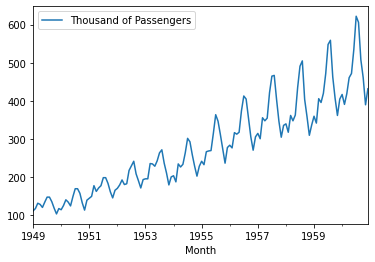

In [11]:
dataset.plot()
plt.show()

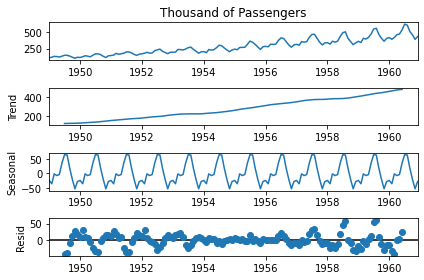

In [12]:
# Decomposition to check dataset component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(dataset['Thousand of Passengers'],period=12)
decomposition.plot()
plt.show()


1. It shows upward trend.
2. It shows seasonality as it shows pattern of high & low ends
3. there are some residual(irregular/white noise) data over the 12 months period which we don't have idea about.

In [13]:
# To check whether data is stationary or non-stationary
# check name - "Augmented Dickey Fuller Test" - this is mandatory step in ML

from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(dataset['Thousand of Passengers'])

(0.8153688792060569,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [15]:
def adf_check(timeseries):
    result=adfuller(timeseries)
    print("Augmented Dickey Fuller Test - Stationary or Non-Stationary")
    labels=['ADF Test Statistics','p-value','#Lags','No. of Observation(n)']
    for a,b in zip(result,labels):
        print(b + " : "+ str(a))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis & my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis & my timeseries is Non-Stationary")

In [16]:
adf_check(dataset['Thousand of Passengers'])

Augmented Dickey Fuller Test - Stationary or Non-Stationary
ADF Test Statistics : 0.8153688792060569
p-value : 0.9918802434376411
#Lags : 13
No. of Observation(n) : 130
Weak evidence against null hypothesis & my timeseries is Non-Stationary


here as it is non-stationary so it can't be used for time series model so first we need to make it stationary.
We can make it stationary using lag function

In [17]:
# Here we will create new column 1st differnce which will calculate the difference between original & shifted values
dataset['1st Difference']=dataset['Thousand of Passengers'] - dataset['Thousand of Passengers'].shift(1)

In [18]:
dataset.head()

,Thousand of Passengers,1st Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [19]:
# Will check if new column data is stationary or not
# As there are missing values we need to drop them
adf_check(dataset['1st Difference'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Stationary
ADF Test Statistics : -2.8292668241699928
p-value : 0.05421329028382636
#Lags : 12
No. of Observation(n) : 130
Weak evidence against null hypothesis & my timeseries is Non-Stationary


In [20]:
# As 1st diff is still non-stationary, we have to create 2nd diff

dataset['2nd Difference']=dataset['1st Difference']-dataset['1st Difference'].shift(1)

In [21]:
dataset.head()

,Thousand of Passengers,1st Difference,2nd Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [22]:
# Will check if new column data is stationary or not
adf_check(dataset['2nd Difference'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Stationary
ADF Test Statistics : -16.384231542468505
p-value : 2.7328918500142407e-29
#Lags : 11
No. of Observation(n) : 130
Strong evidence against null hypothesis & my timeseries is Stationary


In [23]:
# AIC = -2LL+2K
# K=Parameter
# parameter = trend(p d q) / seasonality ( P D Q)

# D/d = difference - integrated

#Trend
# d=2 ( no. of times we calutaled difference)
# p=?
# q=?

#Seasonality
#D=?
#P=?
#Q=?

#ARIMA=Auto Regressive Integrated Moving Avg
# AR-P/p
# I- D/d
# MA-Q/q



In [24]:
# Create a seasonality

dataset['Seasonality']=dataset['Thousand of Passengers']-dataset['Thousand of Passengers'].shift(12)

In [25]:
dataset.head(20)

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [26]:
# Check if seasonality is stationary or not

adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Stationary
ADF Test Statistics : -3.383020726492481
p-value : 0.011551493085514952
#Lags : 1
No. of Observation(n) : 130
Strong evidence against null hypothesis & my timeseries is Stationary


In [28]:
#Trend
# d=2
# p=?
# q=?

#Seasonality
#D=1
#P=?
#Q=?

#  calculate p,1 and P, Q using acf & pacf mathod
#acf- autocorrelation function
#pacf - partial auto correlation function

#ARIMA=Auto Regressive Integrated Moving Avg
# AR-P/p -pacf
# I- D/d - got it ( stationary )
# MA-Q/q -acf

In [29]:
# import acf & pacf 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

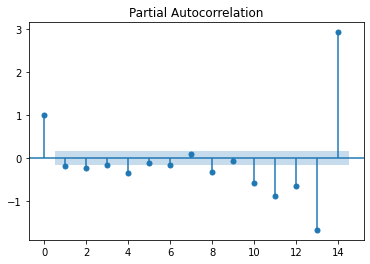

In [30]:
# find p

plot_pacf(dataset['2nd Difference'].dropna(),lags=14)
plt.show()

here p=2

In [41]:

#correlation:
# 1) -0.2 to +0.2 ->neutral/no correlation
# 2) -0.2 to -0.6 and 0.2 to 0.6 -> weak correlation
# 3) -0.6 to -1 and0.6 to 1 -> strong correlation

# +ve sign means directly proportional & -ve sign means inversally proportional
# shaded region represents no correlation
# the time we get no correlation pt. we shop checking further.

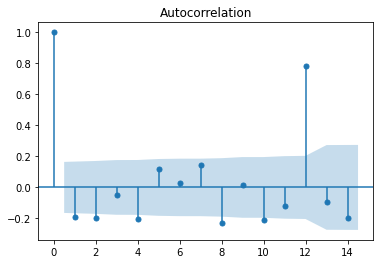

In [32]:
# find q

plot_acf(dataset['2nd Difference'].dropna(),lags=14)
plt.show()

 Here q=2
( at 3rd point it has no correaltion so we stop checking further)

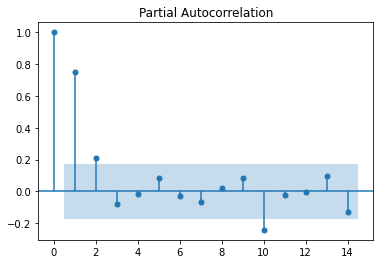

In [35]:
# Find P

plot_pacf(dataset['Seasonality'].dropna(),lags=14)
plt.show()

 here P=2

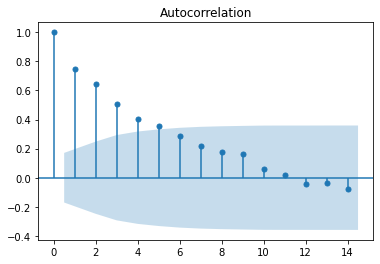

In [38]:
# Find Q

plot_acf(dataset['Seasonality'].dropna(),lags=14)
plt.show()

here Q=5

In [40]:
# Trend
#p=2
#d=2
#q=2

#Seasonality
#P=2
#D=1
#Q=5

### Time Series Forecasting

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [46]:
model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                               order=(2,2,2),seasonal_order=(2,1,5,12))

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
# order-(p,d,q)
#seaonal_order - (P,D,Q,frequency)

In [48]:
result=model.fit()

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [49]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                           Thousand of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -497.263
Date:                                          Thu, 27 Apr 2023   AIC                           1018.526
Time:                                                  13:51:53   BIC                           1052.936
Sample:                                              01-01-1949   HQIC                          1032.508
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [ ]:
# less AIC(error) more accuracy

# AIC =1018.526 when Seasonality=5

In [51]:
# model with seasonality=4
model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                               order=(2,2,2),seasonal_order=(2,1,4,12))
result=model.fit()
print(result.summary())

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                           SARIMAX Results                                           
Dep. Variable:                        Thousand of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.359
Date:                                       Thu, 27 Apr 2023   AIC                           1016.718
Time:                                               14:50:50   BIC                           1048.260
Sample:                                           01-01-1949   HQIC                          1029.534
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3448     

In [ ]:
# AIC =1016.718 when Seasonality=4

In [53]:
# model with seasonality=3
model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                               order=(2,2,2),seasonal_order=(2,1,3,12))
result=model.fit()
print(result.summary())

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                         SARIMAX Results                                          
Dep. Variable:                     Thousand of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.523
Date:                                    Thu, 27 Apr 2023   AIC                           1015.045
Time:                                            14:52:33   BIC                           1043.721
Sample:                                        01-01-1949   HQIC                          1026.697
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3448      0.092    -14.675      0

In [ ]:
# AIC =1015.045 when Seasonality=3

In [54]:
# model with seasonality=2
model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                               order=(2,2,2),seasonal_order=(2,1,2,12))
result=model.fit()
print(result.summary())

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:             Thousand of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -498.053
Date:                            Thu, 27 Apr 2023   AIC                           1014.106
Time:                                    14:53:57   BIC                           1039.914
Sample:                                01-01-1949   HQIC                          1024.593
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3446      0.097    -13.870      0.000      -1.535      -1.155
ar.L2         -0.4231      0.080   

In [ ]:
# AIC =1014.106 when Seasonality=2

In [55]:
# model with seasonality=1
model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                               order=(2,2,2),seasonal_order=(2,1,1,12))
result=model.fit()
print(result.summary())

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:               Thousand of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -498.098
Date:                              Thu, 27 Apr 2023   AIC                           1012.196
Time:                                      14:54:19   BIC                           1035.136
Sample:                                  01-01-1949   HQIC                          1021.517
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3487      0.092    -14.665      0.000      -1.529      -1.168
ar.L2         -0.42

In [56]:
# AIC =1012.196 when Seasonality=1

Seasonality=1 has lowest AIC score, so it is better

### Auto ARIMA Approach

In [60]:
import itertools

p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

print("Few parameter combination are : ")
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))

Few parameter combination are : 
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [63]:
# Implementing above parameters by using permutation & combination approach to get the best AIC value.


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(dataset['Thousand of Passengers'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            result=model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,result.aic))
        except:
            continue

C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.3013773056393
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.2914901508545


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043230612
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445113


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730355
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571389


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312320493
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.9983614399816
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044324


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\

ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026810473435


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801418316637
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290407


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478032679
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.7130010979722
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833895


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\

ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380583
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661916
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347579889
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:944.4876301158429


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\

ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654332
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072915
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759138
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1006.791904739971


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\

ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604695
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825333


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362335157714
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:934.797542574914


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989003
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1205.390778617258
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1029.9773091700697


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\

ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533126
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1017.3155493518586


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272556308005
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660827272


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:945.4400866897394
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414754


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1192.2949631619497
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824623741


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892165
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017291469


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764738037684
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:935.8163348218233


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:935.9152860552227
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1190.5342929076419
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838143


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305535
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1007.6496486406907


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249453719
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:927.5904374710257


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:928.1418620185472
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1377.292685893079


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1185.3340359693436
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1008.5528813487201


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:922.4148960116245
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100681691


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264637013
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:929.5756208330627


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352157


In [64]:
#ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352157
#ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989003
#these are best ones

<AxesSubplot:xlabel='Month'>

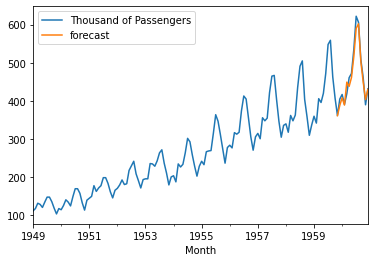

In [65]:
# validate whether model is correct or not

dataset['forecast']=result.predict(start=130,end=144,dynamic=True)
dataset[['Thousand of Passengers','forecast']].plot()


In [66]:
# Model is absolutely correct & its ready to forecast passenger value

In [67]:
from pandas.tseries.offsets import DateOffset

In [68]:
#To add future dates for next 5 years i.e 60 months
future_dates=[dataset.index[-1] + DateOffset(months=x) for x in range(0,60)]

In [69]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [70]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=dataset.columns)

In [71]:
future_dates_df.head()

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [72]:
future_dates_df.tail()

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality,forecast
1965-07-01,NaN,NaN,NaN,NaN,NaN
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


In [73]:
# concatenate dataset & future dataframe

future_df=pd.concat([dataset,future_dates_df])

In [74]:
future_df.head()

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [75]:
future_df.tail()

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality,forecast
1965-07-01,NaN,NaN,NaN,NaN,NaN
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


C:\Users\k.laxmi.keerti\AppData\Local\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


<AxesSubplot:>

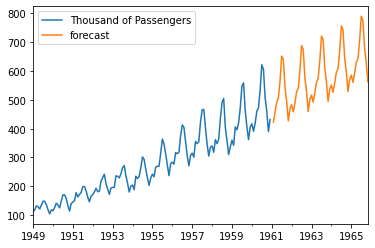

In [81]:
future_df['forecast']=result.predict(start=145,end=203,dynamic=True)
future_df[['Thousand of Passengers','forecast']].plot()

In [82]:
future_df.tail()

,Thousand of Passengers,1st Difference,2nd Difference,Seasonality,forecast
1965-07-01,NaN,NaN,NaN,NaN,790.385799
1965-08-01,NaN,NaN,NaN,NaN,776.859822
1965-09-01,NaN,NaN,NaN,NaN,679.826012
1965-10-01,NaN,NaN,NaN,NaN,631.244533
1965-11-01,NaN,NaN,NaN,NaN,563.100487
